In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("gauravkumar2525/kepler-exoplanet-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/melidia/.cache/kagglehub/datasets/gauravkumar2525/kepler-exoplanet-dataset/versions/1


In [4]:
# Load the dataset
df = pd.read_csv(path + "/exoplanets_data.csv")
print("Loaded dataset shape:", df.shape)
df.describe()

Loaded dataset shape: (9564, 12)


,kepid,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
count,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9564.00000,9564.000000,9564.000000,9564.000000
mean,7.690628e+06,0.780845,0.480829,75.671358,102.891778,1085.385828,7.745737e+03,5706.82328,1.728712,4.310157,14.264606
std,2.653459e+06,0.863026,0.437658,1334.744046,3018.662296,839.940895,1.565099e+05,781.58775,6.009769,0.424316,1.385376
min,7.574500e+05,0.000000,0.000000,0.241843,0.080000,25.000000,0.000000e+00,2661.00000,0.109000,0.047000,6.966000
25%,5.556034e+06,0.000000,0.000000,2.733684,1.430000,553.000000,2.216000e+01,5333.00000,0.835750,4.232750,13.440000
50%,7.906892e+06,0.000000,0.480829,9.752831,2.490000,906.000000,1.583200e+02,5745.00000,1.006500,4.432000,14.520000
75%,9.873066e+06,2.000000,0.995000,40.715178,21.712500,1352.500000,1.110257e+03,6099.00000,1.435250,4.539000,15.322000
max,1.293514e+07,2.000000,1.000000,129995.778400,200346.000000,14667.000000,1.094755e+07,15896.00000,229.908000,5.364000,20.003000


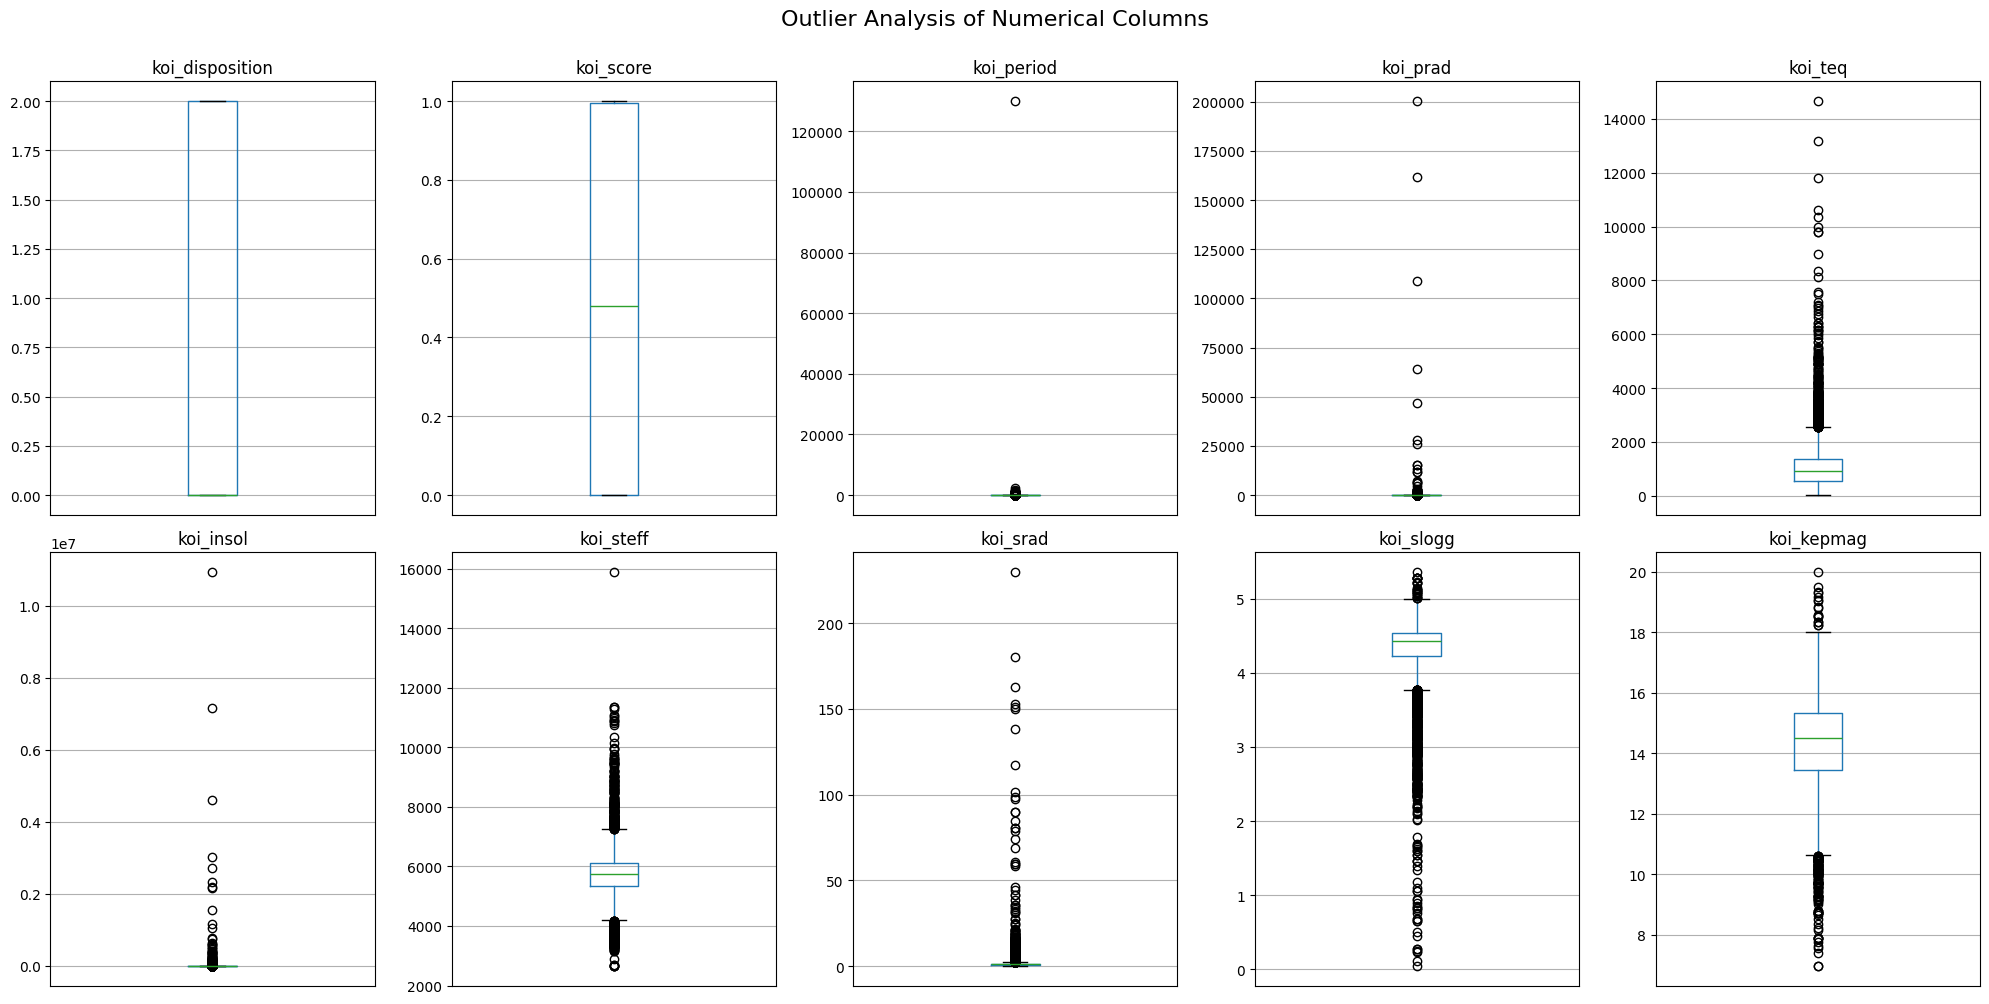

In [5]:
def plot_outliers(df, nrows, ncols, figsize):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    fig.suptitle('Outlier Analysis of Numerical Columns', fontsize=16, y=1)

    # Flatten axes for easier indexing
    axes = axes.flatten()

    # Plot boxplots for each numerical column
    for i, col in enumerate(df.columns):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xticks([])

    plt.tight_layout()
    plt.show()

# Plot outliers
plot_outliers(df.select_dtypes(include=['float64', 'int64']).drop('kepid', axis=1), 2, 5, (20, 10))

In [6]:
def detect_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (df[column] < (Q1 - factor * IQR)) | (df[column] > (Q3 + factor * IQR))
    return is_outlier

# Detect and mark outliers for each numerical column
for col in df.select_dtypes(include=['float64', 'int64']).drop(['kepid', 'koi_disposition', 'koi_score'], axis=1).columns:
    df[col + '_outlier'] = detect_outliers_iqr(df, col)
    print(f"Outliers detected in {col}: {df[col + '_outlier'].sum()} out of {df.shape[0]} rows")

Outliers detected in koi_period: 1567 out of 9564 rows
Outliers detected in koi_prad: 1304 out of 9564 rows
Outliers detected in koi_teq: 450 out of 9564 rows
Outliers detected in koi_insol: 1555 out of 9564 rows
Outliers detected in koi_steff: 595 out of 9564 rows
Outliers detected in koi_srad: 833 out of 9564 rows
Outliers detected in koi_slogg: 734 out of 9564 rows
Outliers detected in koi_kepmag: 156 out of 9564 rows


In [7]:
# Remove the outliers from the main dataset
outlier_columns = [col for col in df.columns if col.endswith('_outlier')]

df_clean_no_transform = df[~df[outlier_columns].any(axis=1)]

print("Cleaned dataset shape without transforms:", df_clean_no_transform.shape)

Cleaned dataset shape without transforms: (5449, 20)


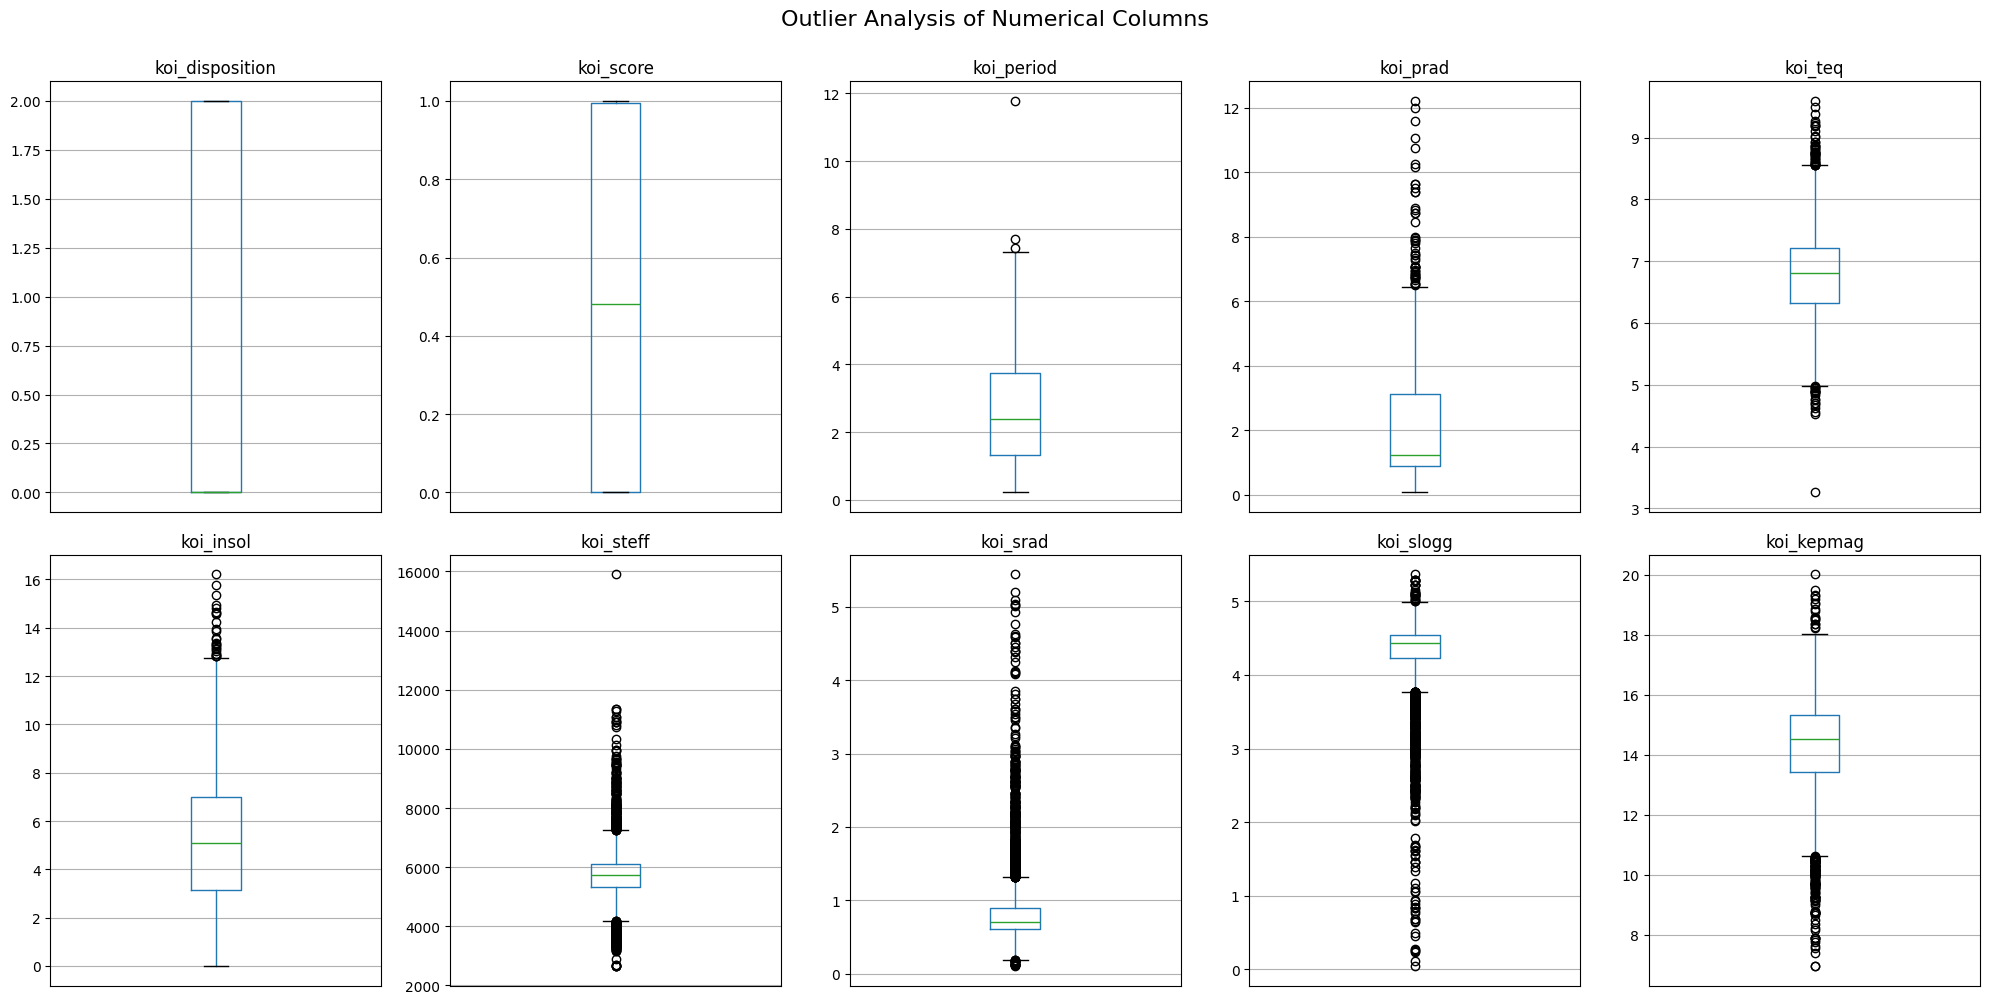

In [8]:
# Apply log1p for each numerical column
df_transformed = df.copy()

log1p_cols = ['koi_period', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_srad']
for col in df[log1p_cols].columns:
    df_transformed[col] = np.log1p(df[col])

plot_outliers(df_transformed.select_dtypes(include=['float64', 'int64']).drop('kepid', axis=1), 2, 5, (20, 10))

In [9]:
# Detect and mark outliers for each numerical column
for col in df_transformed.select_dtypes(include=['float64', 'int64']).drop(['kepid', 'koi_disposition', 'koi_score'], axis=1).columns:
    df_transformed[col + '_outlier'] = detect_outliers_iqr(df_transformed, col)
    print(f"Outliers detected in {col}: {df_transformed[col + '_outlier'].sum()} out of {df_transformed.shape[0]} rows")

Outliers detected in koi_period: 3 out of 9564 rows
Outliers detected in koi_prad: 50 out of 9564 rows
Outliers detected in koi_teq: 64 out of 9564 rows
Outliers detected in koi_insol: 25 out of 9564 rows
Outliers detected in koi_steff: 595 out of 9564 rows
Outliers detected in koi_srad: 664 out of 9564 rows
Outliers detected in koi_slogg: 734 out of 9564 rows
Outliers detected in koi_kepmag: 156 out of 9564 rows


Cleaned dataset shape with np.log1p transform: (8216, 12)


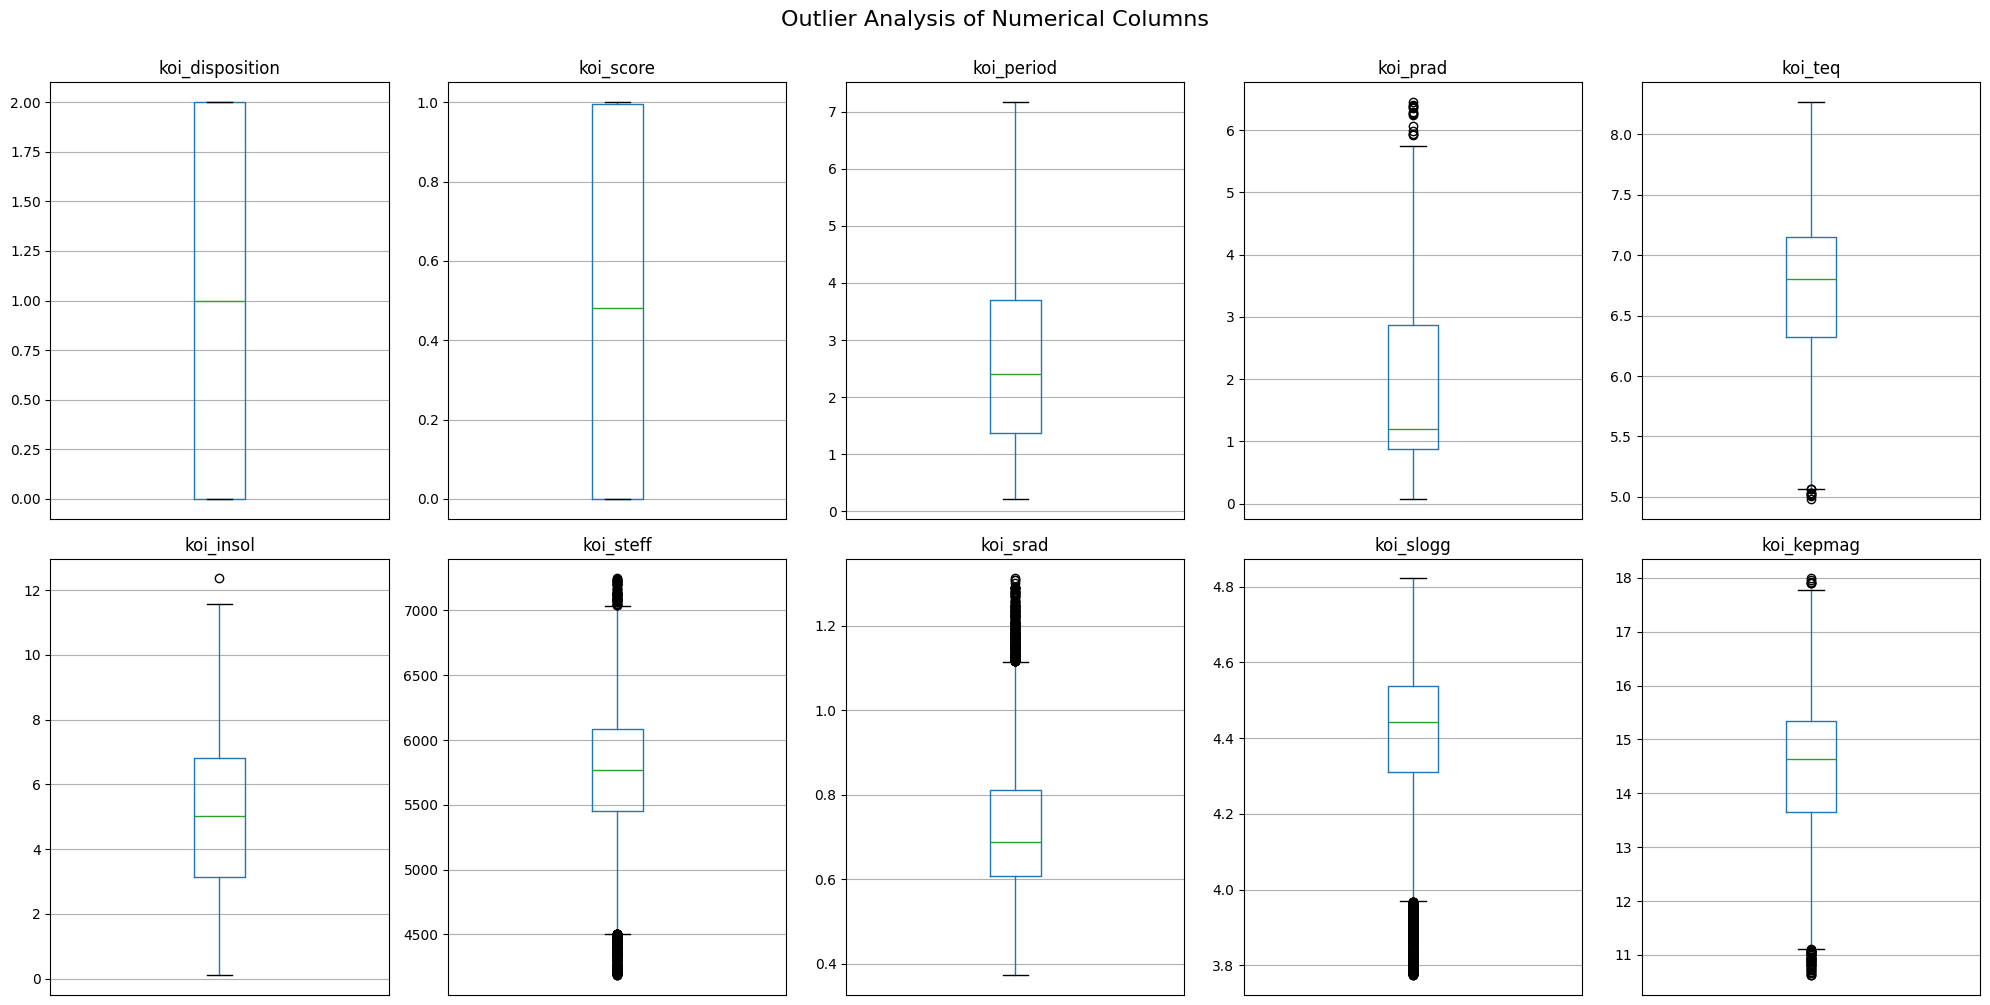

In [10]:
# Remove the outliers from the main dataset
outlier_columns = [col for col in df_transformed.columns if col.endswith('_outlier')]

df_clean_transform = df_transformed[~df_transformed[outlier_columns].any(axis=1)]
df_clean_transform = df_clean_transform.drop(columns=outlier_columns)

print("Cleaned dataset shape with np.log1p transform:", df_clean_transform.shape)

plot_outliers(df_clean_transform.select_dtypes(include=['float64', 'int64']).drop('kepid', axis=1), 2, 5, (20, 10))

In [11]:
df_clean_transform

,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
0,10797460,K00752.01,2,1.000,2.350235,1.181727,6.677083,4.549552,5455.0,0.655964,4.467,15.347
1,10797460,K00752.02,2,0.969,4.014911,1.342865,6.095825,2.313525,5455.0,0.655964,4.467,15.347
2,10811496,K00753.01,1,0.000,3.039708,2.747271,6.459904,3.696351,5853.0,0.624868,4.544,15.436
3,10848459,K00754.01,0,0.000,1.006845,3.539799,7.241366,6.794542,5805.0,0.582774,4.564,15.597
4,10854555,K00755.01,2,1.000,1.260048,1.321756,7.249215,6.832126,6031.0,0.715887,4.438,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...
9558,10031643,K07984.01,0,0.000,2.260707,0.746688,6.835185,5.178407,5638.0,0.736207,4.296,14.478
9559,10090151,K07985.01,0,0.000,0.423762,3.412797,7.644441,8.412173,5638.0,0.643432,4.529,14.082
9560,10128825,K07986.01,1,0.497,1.007903,0.542324,7.383368,7.369481,6119.0,0.708528,4.444,14.757
9561,10147276,K07987.01,0,0.021,0.519628,0.727549,7.704812,8.650746,6173.0,0.713440,4.447,15.385


 Status of the exoplanet candidate (converted to numerical values):

In [12]:
df_clean_transform.koi_disposition.describe()

count    8216.000000
mean        0.811709
std         0.870125
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: koi_disposition, dtype: float64

datele sunt cat de cat echilibrate , adica sunt suficiente clase din ambele parti pentru o clasificare corecta daca keplerul este locuibil sau nu. de asemenea, sunt si suficiente date pentru ca modelul sa invete tendintele (prin valorile acelea de 1)

Confidence score for the planetary classification (higher values indicate stronger confidence).

In [13]:
df_clean_transform.koi_score.describe()

count    8216.000000
mean        0.496579
std         0.438997
min         0.000000
25%         0.000000
50%         0.480829
75%         0.996000
max         1.000000
Name: koi_score, dtype: float64

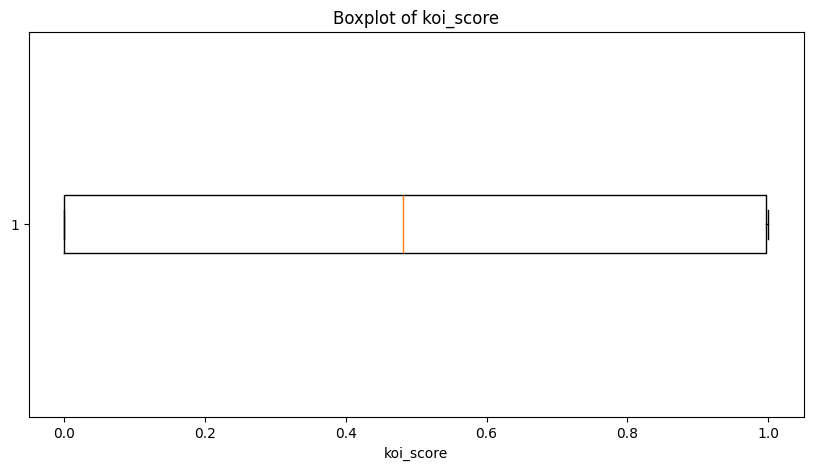

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_clean_transform.koi_score, vert=False)
plt.title('Boxplot of koi_score')
plt.xlabel('koi_score')
plt.show()

Orbital period of the planet (in days).

In [14]:
df_clean_transform.koi_period.describe()

count    8216.000000
mean        2.684946
std         1.643676
min         0.216596
25%         1.362851
50%         2.401768
75%         3.706097
max         7.167317
Name: koi_period, dtype: float64

media de orbitare a planetelor studiate este de 2 zile. sunt foarte multe planete care orbiteaza in mai putin de 4 zile (25, 50 si 75 se afla sub 4 zile). considerabil sunt foarte putine planete care orbiteaza mai mult de 5 zile. deviatia standard arata cat de apropiate sunt de medie date.

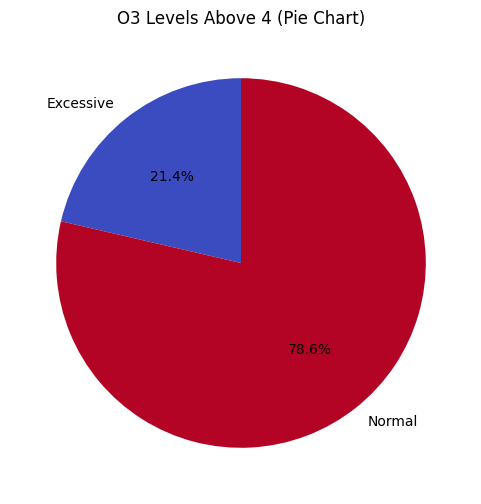

In [ ]:
th_excessive = 4  # Adjust this value as needed

# Count how many rows exceed the threshold
excessive_count = len(df_clean_transform[df_clean_transform.koi_period >= th_excessive])

# Count how many rows do not exceed the threshold
normal_count = len(df_clean_transform[df_clean_transform.koi_period < th_excessive])

# Create a DataFrame for the pie chart
counts = pd.Series([excessive_count, normal_count], index=['Excessive', 'Normal'])

# Plot the pie chart
plt.figure(figsize=(6, 6))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap="coolwarm")

# Add a title
plt.title(f"Orbital period {th_excessive} (Pie Chart)")

# Show the plot
plt.show()

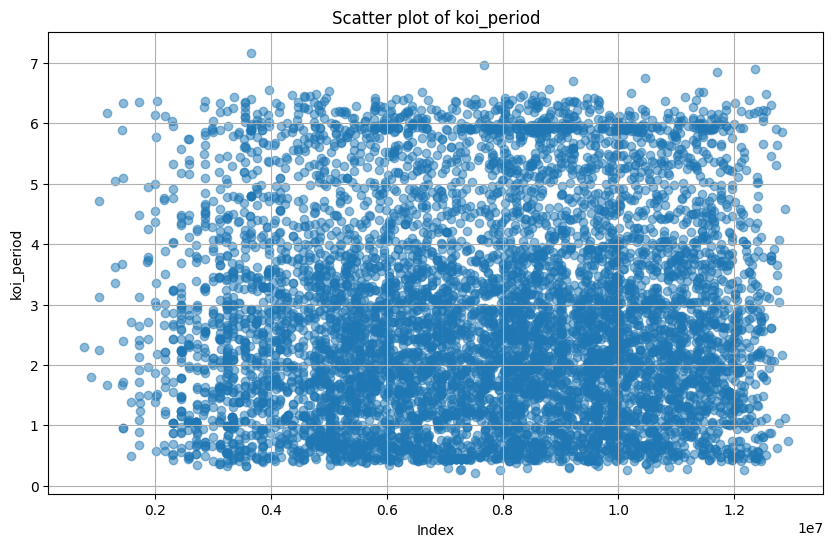

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean_transform.kepid, df_clean_transform.koi_period, alpha=0.5)
plt.title('Scatter plot of koi_period')
plt.xlabel('Index')
plt.ylabel('koi_period')
plt.grid()
plt.show()

sunt foarte multe puncte in perioada 0, 4 de orbitare (sunt foarte apropiate unele de altele), iar apoi incep sa se disperseze, ceea ce ne a spus si statistica

Estimated planetary radius (in Earth radii).

In [15]:
df_clean_transform.koi_prad.describe()

count    8216.000000
mean        1.826896
std         1.331964
min         0.076961
25%         0.871293
50%         1.205971
75%         2.869176
max         6.448145
Name: koi_prad, dtype: float64

datele sunt extrem de apropiate de medie, adica de aproape 2 zile, acest lucru aratandu se prin std. diferenta dintre 75 si max este foarte mare, astfel raza multor planete este apropiata sub 3. (acest lucru e important pentru mai jos)

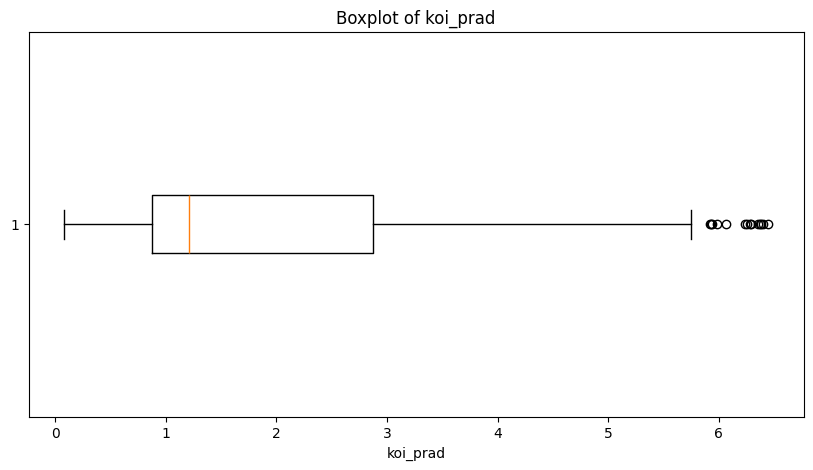

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_clean_transform.koi_prad, vert=False)
plt.title('Boxplot of koi_prad')
plt.xlabel('koi_prad')
plt.show()

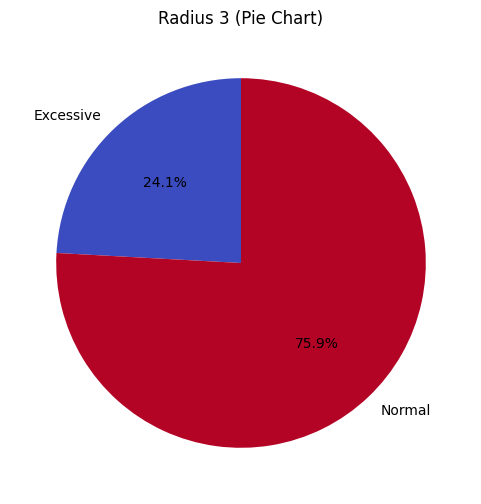

In [31]:
th_excessive = 3  # Adjust this value as needed

# Count how many rows exceed the threshold
excessive_count = len(df_clean_transform[df_clean_transform.koi_prad >= th_excessive])

# Count how many rows do not exceed the threshold
normal_count = len(df_clean_transform[df_clean_transform.koi_prad < th_excessive])

# Create a DataFrame for the pie chart
counts = pd.Series([excessive_count, normal_count], index=['Excessive', 'Normal'])

# Plot the pie chart
plt.figure(figsize=(6, 6))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap="coolwarm")

# Add a title
plt.title(f"Radius {th_excessive} (Pie Chart)")

# Show the plot
plt.show()

Estimated equilibrium temperature of the planet (Kelvin).

In [16]:
df_clean_transform.koi_teq.describe()

count    8216.000000
mean        6.722504
std         0.627022
min         4.983607
25%         6.318968
50%         6.800170
75%         7.153834
max         8.265136
Name: koi_teq, dtype: float64

aici datele sunt extrem de apropiate de medie, std ul fiind sub 1. astfel, teq se va afla in jurul la 6.7 in majoritatea dintre cazuri. un scatterplot ilustrativ ar arata sub forma unei bile

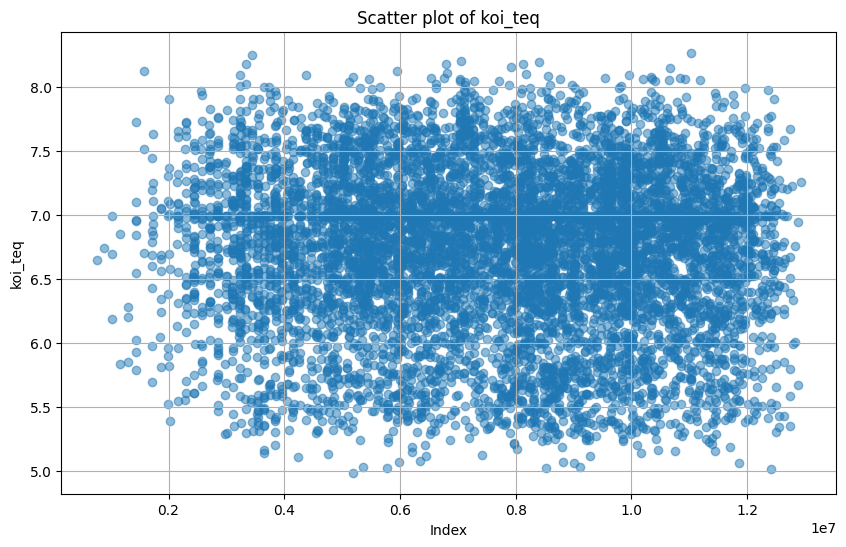

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean_transform.kepid, df_clean_transform.koi_teq, alpha=0.5)
plt.title('Scatter plot of koi_teq')
plt.xlabel('Index')
plt.ylabel('koi_teq')
plt.grid()
plt.show()

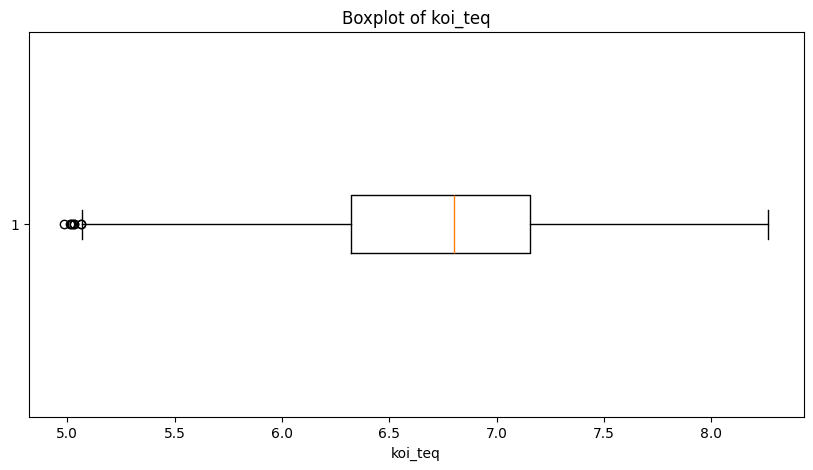

In [33]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_clean_transform.koi_teq, vert=False)
plt.title('Boxplot of koi_teq')
plt.xlabel('koi_teq')
plt.show()

Insolation flux received by the planet (relative to Earth's insolation).

In [17]:
df_clean_transform.koi_insol.describe()

count    8216.000000
mean        4.948897
std         2.473327
min         0.104360
25%         3.148775
50%         5.027460
75%         6.802103
max        12.363292
Name: koi_insol, dtype: float64

media e 4, minimul e 0, iar maximul este 12. din nou, majoritatea datelor au insol mai mic decat 7, acest lucru aratandu se prin acel 75. 75 si max sunt foarte departate.

Stellar radius (in solar radii).

In [18]:
df_clean_transform.koi_srad.describe()

count    8216.000000
mean        0.726907
std         0.166801
min         0.372942
25%         0.608134
50%         0.689139
75%         0.810930
max         1.312379
Name: koi_srad, dtype: float64

aici datele arata frumos. sunt intre 0.3 si 1.3, media este undeva la mijloc (adica 0.7), std este foarte mic. asta inseamna ca datele sunt destul de apropiate, 25 50 si 75 fiind ele suficient de apropiate. 

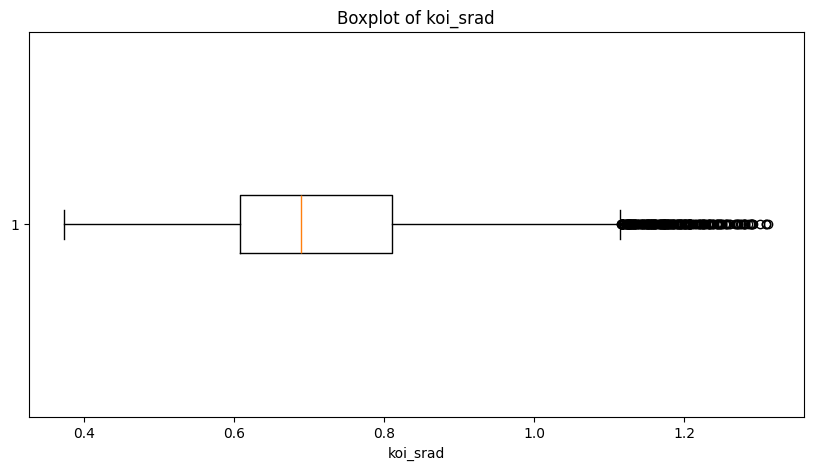

In [34]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_clean_transform.koi_srad, vert=False)
plt.title('Boxplot of koi_srad')
plt.xlabel('koi_srad')
plt.show()

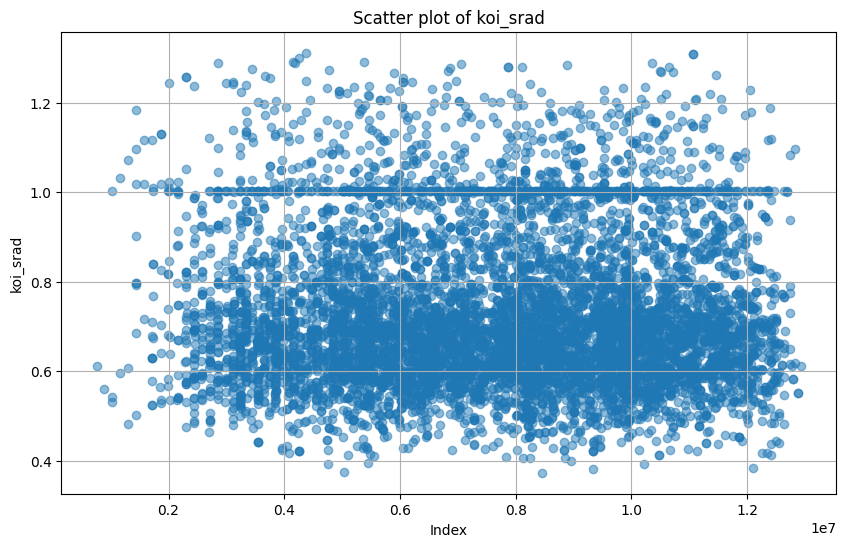

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean_transform.kepid, df_clean_transform.koi_srad, alpha=0.5)
plt.title('Scatter plot of koi_srad')
plt.xlabel('Index')
plt.ylabel('koi_srad')
plt.grid()
plt.show()

Surface gravity of the host star (logarithmic scale, in cm/s²).

In [19]:
df_clean_transform.koi_slogg.describe()

count    8216.000000
mean        4.394293
std         0.195823
min         3.774000
25%         4.310157
50%         4.442000
75%         4.538000
max         4.822000
Name: koi_slogg, dtype: float64

datele sunt cuprinse intr un interval mic, de aici si std mic. media este undeva la mijloc intre minim si maxim.

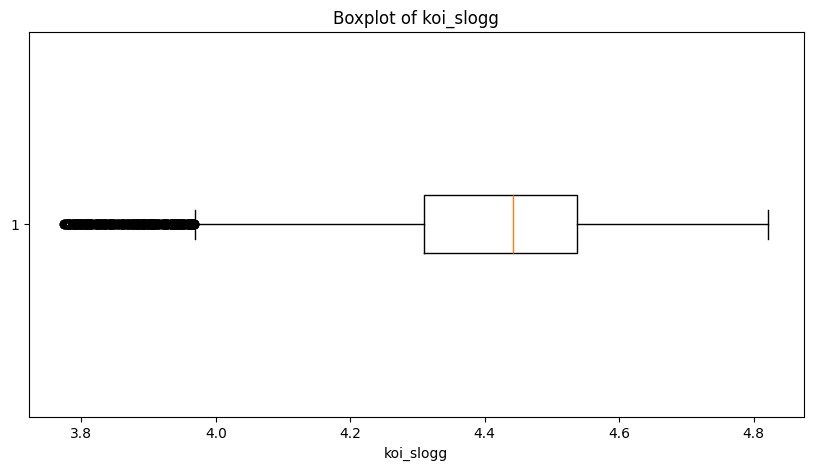

In [36]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_clean_transform.koi_slogg, vert=False)
plt.title('Boxplot of koi_slogg')
plt.xlabel('koi_slogg')
plt.show()

Kepler-band magnitude (brightness of the star as observed by Kepler).

In [20]:
df_clean_transform.koi_kepmag.describe()

count    8216.000000
mean       14.413464
std         1.193501
min        10.624000
25%        13.652000
50%        14.640000
75%        15.344000
max        17.991000
Name: koi_kepmag, dtype: float64

datele se afla intre 10 si 17, iar media este undeva la mijloc. std este de asemenea mic, datele fiind destul de apropiate de medie. 25, 50 si 75 sunt de asemenea apropiate intre ele.

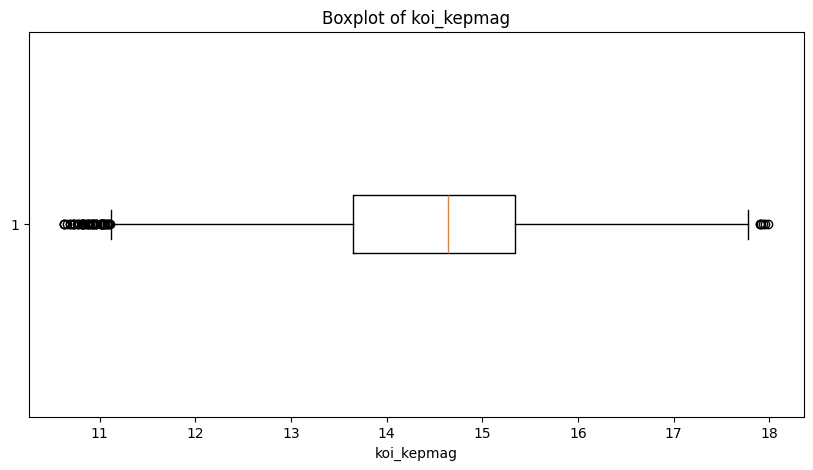

In [37]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_clean_transform.koi_kepmag, vert=False)
plt.title('Boxplot of koi_kepmag')
plt.xlabel('koi_kepmag')
plt.show()

Effective temperature of the host star (Kelvin).

In [21]:
df_clean_transform.koi_steff.describe()

count    8216.000000
mean     5742.196643
std       523.676581
min      4186.000000
25%      5455.000000
50%      5768.000000
75%      6088.000000
max      7247.000000
Name: koi_steff, dtype: float64

datele se afla intre 4000 si 7000, iar media este undeva la mijloc. datele sunt foarte apropiate de medie, std fiind mic comparativ cu dimensiunea datelor. 25 si 75 sunt destul de echilibrate (adica au cam aceeasi distanta fata de min si max), asta insemnand ca graficul seamana cu o distributie normala (seamana dar nu e la fel). 

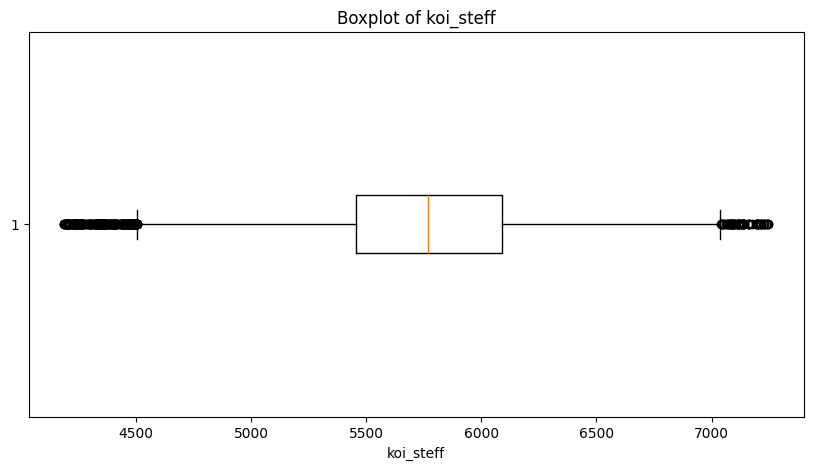

In [38]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_clean_transform.koi_steff, vert=False)
plt.title('Boxplot of koi_steff')
plt.xlabel('koi_steff')
plt.show()

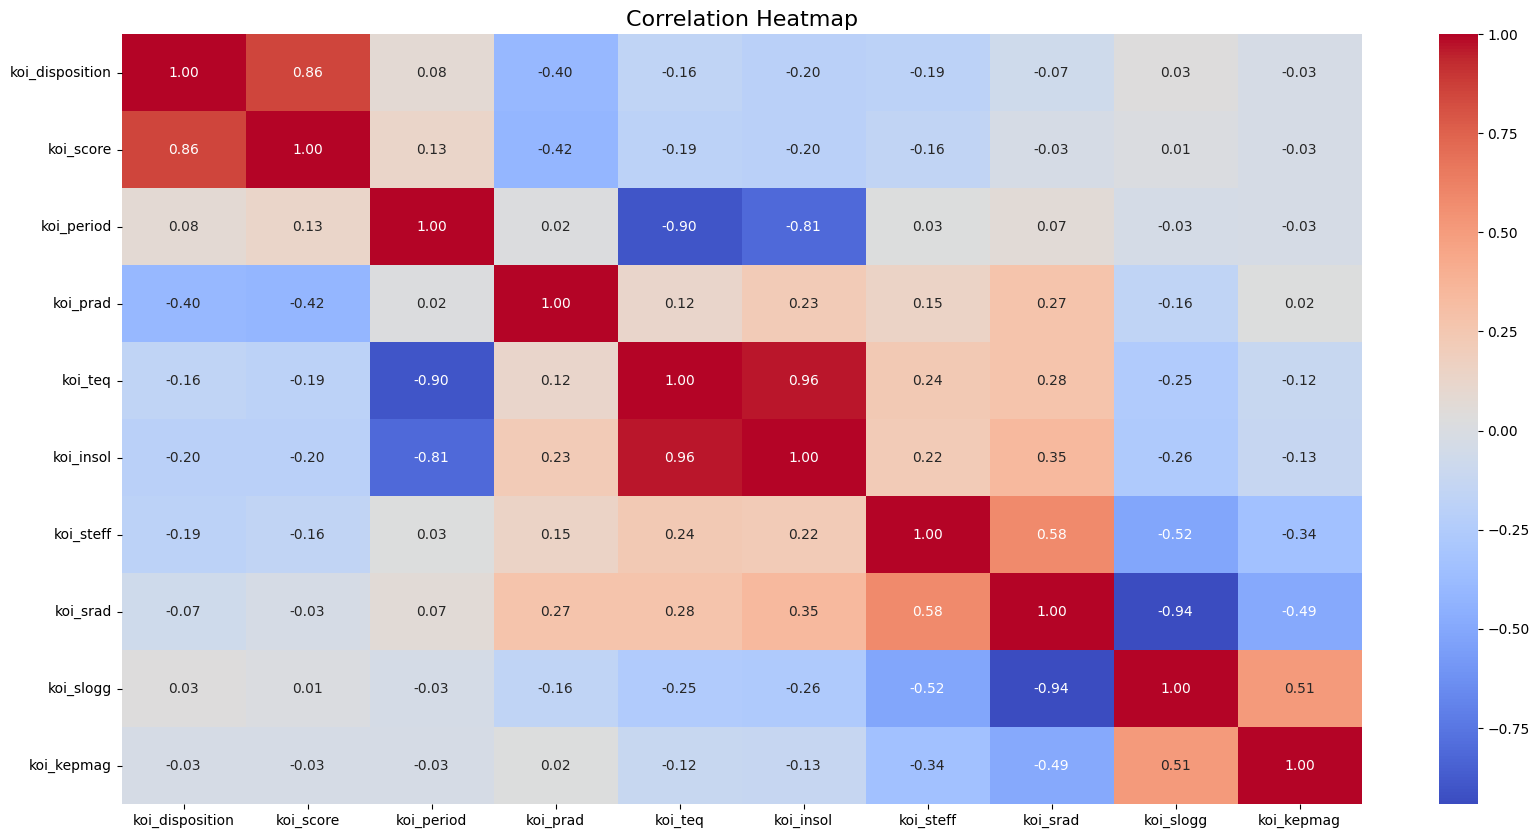

In [23]:
#heatmap matrix with correlations between features
import seaborn as sns
plt.figure(figsize=(20, 10))
df_without_kepid_and_kepoi_name = df_clean_transform.drop(columns=['kepid', 'kepoi_name'])
sns.heatmap(df_without_kepid_and_kepoi_name.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

explicatii: 
score si disposition sunt puternic pozitiv corelate; este firesc deoarece score reprezinta confidenta cu care o stea e kepler sau nu, lucru indicat chiar de disposition.
teq si period sunt puternic negativ corelate, adica cand una creste cealalta scade; asta deoarece o planeta departata de soare (si implicit de pamant) are temperatura mica; de asemenea, orbiteaza pe o distanta mai mare, deci se mareste si durata unei parcurgeri de cerc
insol si period sunt de asemenea puternic negativ corelate, adica cand una creste cealalta scade; asta inseamna ca cu cat perioada de orbitare creste, cu atat ea e mai departata de soare, deci scade intensitatea luminii primita de la el
slogg si srad sunt corelate puternic negativ; srad este raza stelei, iar slogg este gravitatia logaritmica; deoarece gravitatia tine cont de raza stelei, exista proportionalitate intre ele. Daca masa este fixa si raza creste, gravitatia scade (pt ca asa este formula). de aici si corelatia negativa

datorita acestor rezultate, adica din cauza corelatiei crescute, se pot eimina slogg si teq. ideal, se elimina si score, acesta oferind foarte multe informatii legate de score (adica sunt extrem de apropiate ca si definitie)